3D Sinusoidal Data using Artificial Neural Network(s)

#### Erin Moore


## Overview

Used artificial neural network(s) to solve simple regression problem.  I will fit a neural network to a 3D sinusoidal data set. Used a `Sequential` model to be trained very quickly on the supplied data, and manually adjusted hyperparameter values and observed their influence on the model's predictions.

Built an ANN that modeled the data. Trained the model and used it to predict a curve obtain a smooth and less eratic curve. Computed the generalization error on the test set.

## Package Imports

In [2]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):

    w = .5
    h = .5
    fig = plt.figure(figsize=(12,10))

    ax = plt.subplot(2,2,1, projection = '3d')
    ax.scatter3D(data_df.iloc[:,0], data_df.iloc[:,2], data_df.iloc[:,1])
    ax.set_xlabel('x', rotation = 0)
    ax.set_ylabel('y', rotation = 0)
    ax.set_zlabel('z', rotation = 0)
    ax.view_init(0,90)
    ax.set_position([0, .5, w, h])

    ax2 = plt.subplot(2,2,2, projection = '3d')
    ax2.scatter3D(data_df.iloc[:,0], data_df.iloc[:,2], data_df.iloc[:,1])
    ax2.set_xlabel('x', rotation = 0)
    ax2.set_ylabel('y', rotation = 0)
    ax2.set_zlabel('z', rotation = 0)
    ax2.view_init(20,0)
    ax2.set_position([.5, .5, w, h])

    ax3 = plt.subplot(2,2,3, projection = '3d')
    ax3.scatter3D(data_df.iloc[:,0], data_df.iloc[:,2], data_df.iloc[:,1])
    ax3.set_xlabel('x', rotation = 0)
    ax3.set_ylabel('y', rotation = 0)
    ax3.set_zlabel('z', rotation = 0)
    ax3.view_init(20,90)
    ax3.set_position([0, 0, w, h])

    ax4 = plt.subplot(2,2,4, projection = '3d')
    ax4.scatter3D(data_df.iloc[:,0], data_df.iloc[:,2], data_df.iloc[:,1])
    ax4.set_xlabel('x', rotation = 0)
    ax4.set_ylabel('y', rotation = 0)
    ax4.set_zlabel('z', rotation = 0)
    ax4.view_init(90,00)
    ax4.set_position([.5, 0, w, h])
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig2 = plt.figure(figsize=(8,8))
    ax = fig2.add_subplot(projection='3d')
    ax.scatter(scat_x, scat_y, scat_z,c='r')
    new_z, new_y, new_x = zip(*sorted(zip(fit_z, fit_y, fit_x)))
    ax.plot3D(new_x, new_y, new_z, c='b')
    ax.set_xlabel('x', rotation = 0)
    ax.set_ylabel('y', rotation = 0)
    ax.set_zlabel('z', rotation = 0)
    ax.view_init(20,70)


# Imported, Standardized, and Split Data

1. Imported the data from the file called `3DSinusoidalANN.csv`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Saved the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specified the `random_state` parameter to be `42`.

3. Used the `StandardScaler()` to scale the data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# reading in data
data = pd.read_csv('3DSinusoidalANN.csv')
X = data[['x','z']]
y = data.y

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train, y_train), columns = ['x', 'z'])

X_test = pd.DataFrame(scaler.transform(X_test), columns = ['x','z'])


# Plotted Data

Plotted the training data.

In [5]:
train_df = pd.concat([X,y], axis = 1)

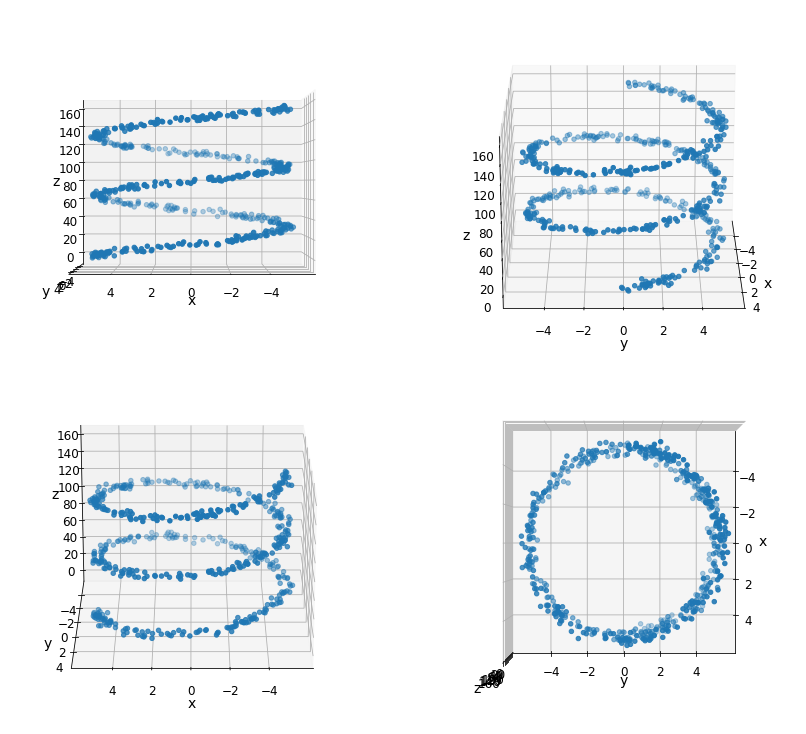

In [6]:
plot3Ddata(train_df)

# 3D Sinusoidal Data with Artifical Neural Network(s)

Fit a `Sequential` model to this data. Manually assigned values to the hyperparameters, including the number of nuerons per layer and the number of layers. Built an ANN that modeled the data well.

In [7]:
from sklearn.neural_network import MLPRegressor

n_layers = 50
n_neurons = 100
params = {'hidden_layer_sizes':(n_neurons, n_layers + 2),
          'max_iter': 10000,
          'activation': 'tanh',
          'solver': 'adam',
          'n_iter_no_change': 10}

ann = MLPRegressor(**params).fit(X_train, y_train)

### Plotted Model Predictions for Training Set

Used the model's `predict()` method to make a prediction for y using the x and z training data.  Used the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [8]:
y_predictions = ann.predict(X_train)

In [9]:
x_train = X_train.x.to_numpy()
z_train = X_train.z.to_numpy() 


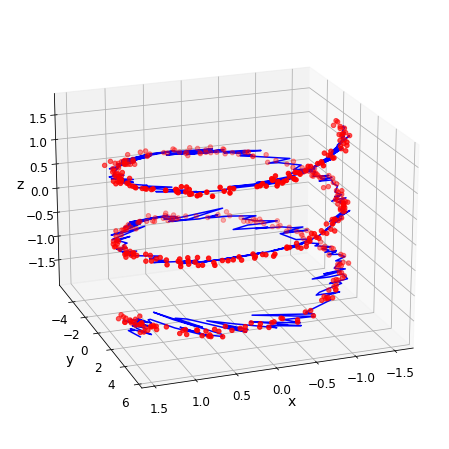

In [10]:
plotscatter3Ddata(x_train, y_predictions, z_train, x_train, y_train, z_train)

# Computed Generalization Error

Computed the generalization error and used MSE as the generalization error metric.

In [11]:
from sklearn.metrics import mean_squared_error as mse

# predicting on test data with optimal models
pred_ann_test = ann.predict(X_test)

# calculating error for optimal models
mse_ann_test = mse(y_test, pred_ann_test)

# displaying error
print("MSE for ANN: ", mse_ann_test)


MSE for ANN:  0.3323550628018263
